In [1]:
# Notebook 2 - plotting sites and looking at 5 days of data for
# my sites of interest

In [2]:
########################################################
# The EA publish daily data on https://environment.data.gov.uk/
# flood-monitoring/archive giving river levels about once  
# every couple of hours.  Each file is a huge dataset, so my 
# first task will be to extract the data from each of the 
# stations I am interested in, ditch the rest and put them 
# together into one dataframe lasting multiple days (possibly 
# a month eventually?)  I will aim to start with the last 5 days
# of February.
########################################################

In [3]:
import pandas as pd     
import numpy as np
import requests 
import matplotlib.pyplot as plt

In [4]:
# The file has "stationReference" as the key field I can search 
# on to tie back to the data I have, without searching 
# on a url. From previously:
#            ~ Cowley Bridge  = 45117
#            ~ Upton Hellions = 45136
#            ~ Yeoford        = 45137

In [5]:
df20240229 = pd.read_csv("data/readings-full-2024-02-29.csv") 
df20240229.head()
df20240229.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412561 entries, 0 to 412560
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   dateTime          412561 non-null  object
 1   date              412561 non-null  object
 2   measure           412561 non-null  object
 3   station           412561 non-null  object
 4   label             412561 non-null  object
 5   stationReference  412561 non-null  object
 6   parameter         412561 non-null  object
 7   qualifier         400749 non-null  object
 8   datumType         186952 non-null  object
 9   period            412561 non-null  int64 
 10  unitName          412561 non-null  object
 11  valueType         412561 non-null  object
 12  value             412559 non-null  object
dtypes: int64(1), object(12)
memory usage: 40.9+ MB


In [6]:
mask_for_cowley = df20240229["stationReference"] == "45117"
dfcowley = df20240229[mask_for_cowley]
dfcowley.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 7783 to 408062
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dateTime          87 non-null     object
 1   date              87 non-null     object
 2   measure           87 non-null     object
 3   station           87 non-null     object
 4   label             87 non-null     object
 5   stationReference  87 non-null     object
 6   parameter         87 non-null     object
 7   qualifier         87 non-null     object
 8   datumType         0 non-null      object
 9   period            87 non-null     int64 
 10  unitName          87 non-null     object
 11  valueType         87 non-null     object
 12  value             87 non-null     object
dtypes: int64(1), object(12)
memory usage: 9.5+ KB


In [7]:
mask_for_upton = df20240229["stationReference"] == "45136"
dfupton = df20240229[mask_for_upton]
dfupton.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 61086 to 293314
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dateTime          65 non-null     object
 1   date              65 non-null     object
 2   measure           65 non-null     object
 3   station           65 non-null     object
 4   label             65 non-null     object
 5   stationReference  65 non-null     object
 6   parameter         65 non-null     object
 7   qualifier         65 non-null     object
 8   datumType         0 non-null      object
 9   period            65 non-null     int64 
 10  unitName          65 non-null     object
 11  valueType         65 non-null     object
 12  value             65 non-null     object
dtypes: int64(1), object(12)
memory usage: 7.1+ KB


In [8]:
mask_for_yeoford = df20240229["stationReference"] == "45137"
dfyeoford = df20240229[mask_for_yeoford]
dfyeoford.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 63726 to 293283
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dateTime          65 non-null     object
 1   date              65 non-null     object
 2   measure           65 non-null     object
 3   station           65 non-null     object
 4   label             65 non-null     object
 5   stationReference  65 non-null     object
 6   parameter         65 non-null     object
 7   qualifier         65 non-null     object
 8   datumType         0 non-null      object
 9   period            65 non-null     int64 
 10  unitName          65 non-null     object
 11  valueType         65 non-null     object
 12  value             65 non-null     object
dtypes: int64(1), object(12)
memory usage: 7.1+ KB


In [9]:
# So I've extracted the lines I want, for ease of cleansing I 
# need to put them back together again into a new dataframe

df29 = pd.concat([dfcowley, dfupton, dfyeoford], axis = 0)
df29.info()   # df29 is just the data from 29th February 2024

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 7783 to 293283
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dateTime          217 non-null    object
 1   date              217 non-null    object
 2   measure           217 non-null    object
 3   station           217 non-null    object
 4   label             217 non-null    object
 5   stationReference  217 non-null    object
 6   parameter         217 non-null    object
 7   qualifier         217 non-null    object
 8   datumType         0 non-null      object
 9   period            217 non-null    int64 
 10  unitName          217 non-null    object
 11  valueType         217 non-null    object
 12  value             217 non-null    object
dtypes: int64(1), object(12)
memory usage: 23.7+ KB


In [10]:
# Success!  I now have one day's worth of data...
# Chopping out each day individually seems laboured, when 
# handling more I will create a better way of doing this, but 
# for now I only want five days to play with so lets stick with 
# this.

In [11]:
df20240228 = pd.read_csv("data/readings-full-2024-02-28.csv") 
mask_for_cowley = df20240228["stationReference"] == "45117"
dfcowley = df20240228[mask_for_cowley]
mask_for_upton = df20240228["stationReference"] == "45136"
dfupton = df20240228[mask_for_upton]
mask_for_yeoford = df20240228["stationReference"] == "45137"
dfyeoford = df20240228[mask_for_yeoford]
df28 = pd.concat([dfcowley, dfupton, dfyeoford], axis = 0)
df28.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 11282 to 288119
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dateTime          210 non-null    object
 1   date              210 non-null    object
 2   measure           210 non-null    object
 3   station           210 non-null    object
 4   label             210 non-null    object
 5   stationReference  210 non-null    object
 6   parameter         210 non-null    object
 7   qualifier         210 non-null    object
 8   datumType         0 non-null      object
 9   period            210 non-null    int64 
 10  unitName          210 non-null    object
 11  valueType         210 non-null    object
 12  value             210 non-null    object
dtypes: int64(1), object(12)
memory usage: 23.0+ KB


In [12]:
df20240227 = pd.read_csv("data/readings-full-2024-02-27.csv") 
mask_for_cowley = df20240227["stationReference"] == "45117"
dfcowley = df20240227[mask_for_cowley]
mask_for_upton = df20240227["stationReference"] == "45136"
dfupton = df20240227[mask_for_upton]
mask_for_yeoford = df20240227["stationReference"] == "45137"
dfyeoford = df20240227[mask_for_yeoford]
df27 = pd.concat([dfcowley, dfupton, dfyeoford], axis = 0)
df27.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 11257 to 287429
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dateTime          219 non-null    object
 1   date              219 non-null    object
 2   measure           219 non-null    object
 3   station           219 non-null    object
 4   label             219 non-null    object
 5   stationReference  219 non-null    object
 6   parameter         219 non-null    object
 7   qualifier         219 non-null    object
 8   datumType         0 non-null      object
 9   period            219 non-null    int64 
 10  unitName          219 non-null    object
 11  valueType         219 non-null    object
 12  value             219 non-null    object
dtypes: int64(1), object(12)
memory usage: 24.0+ KB


In [13]:
df20240226 = pd.read_csv("data/readings-full-2024-02-26.csv") 
mask_for_cowley = df20240226["stationReference"] == "45117"
dfcowley = df20240226[mask_for_cowley]
mask_for_upton = df20240226["stationReference"] == "45136"
dfupton = df20240226[mask_for_upton]
mask_for_yeoford = df20240226["stationReference"] == "45137"
dfyeoford = df20240226[mask_for_yeoford]
df26 = pd.concat([dfcowley, dfupton, dfyeoford], axis = 0)
df26.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 11496 to 55175
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dateTime          41 non-null     object 
 1   date              41 non-null     object 
 2   measure           41 non-null     object 
 3   station           41 non-null     object 
 4   label             41 non-null     object 
 5   stationReference  41 non-null     object 
 6   parameter         41 non-null     object 
 7   qualifier         41 non-null     object 
 8   datumType         0 non-null      object 
 9   period            41 non-null     float64
 10  unitName          41 non-null     object 
 11  valueType         41 non-null     object 
 12  value             41 non-null     object 
dtypes: float64(1), object(12)
memory usage: 4.5+ KB


In [14]:
df20240225 = pd.read_csv("data/readings-full-2024-02-25.csv") 
mask_for_cowley = df20240225["stationReference"] == "45117"
dfcowley = df20240225[mask_for_cowley]
mask_for_upton = df20240225["stationReference"] == "45136"
dfupton = df20240225[mask_for_upton]
mask_for_yeoford = df20240225["stationReference"] == "45137"
dfyeoford = df20240225[mask_for_yeoford]
df25 = pd.concat([dfcowley, dfupton, dfyeoford], axis = 0)
df25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 11294 to 29668
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dateTime          8 non-null      object 
 1   date              8 non-null      object 
 2   measure           8 non-null      object 
 3   station           8 non-null      object 
 4   label             8 non-null      object 
 5   stationReference  8 non-null      object 
 6   parameter         8 non-null      object 
 7   qualifier         8 non-null      object 
 8   datumType         0 non-null      object 
 9   period            8 non-null      float64
 10  unitName          8 non-null      object 
 11  valueType         8 non-null      object 
 12  value             8 non-null      object 
dtypes: float64(1), object(12)
memory usage: 896.0+ bytes


In [15]:
# so having extracted just the data I want into a dataframe for 
# each individual date I will combine the 5 days 
# worth of data all all into one dataframe to work with further.

df25_29 = pd.concat([df25, df26, df27, df28, df29], axis = 0)
df25_29.info()

# success, I have all columns with no nulls except datumType, 
# that is null for all of them.

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 11294 to 293283
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dateTime          695 non-null    object 
 1   date              695 non-null    object 
 2   measure           695 non-null    object 
 3   station           695 non-null    object 
 4   label             695 non-null    object 
 5   stationReference  695 non-null    object 
 6   parameter         695 non-null    object 
 7   qualifier         695 non-null    object 
 8   datumType         0 non-null      object 
 9   period            695 non-null    float64
 10  unitName          695 non-null    object 
 11  valueType         695 non-null    object 
 12  value             695 non-null    object 
dtypes: float64(1), object(12)
memory usage: 76.0+ KB


In [16]:
df25_29.tail(2)   # just looking at my data

,dateTime,date,measure,station,label,stationReference,parameter,qualifier,datumType,period,unitName,valueType,value
293166,2024-02-29T04:45:00Z,2024-02-29,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,Yeoford,45137,level,Stage,NaN,900.0,m,instantaneous,0.583
293283,2024-02-29T06:00:00Z,2024-02-29,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,Yeoford,45137,level,Stage,NaN,900.0,m,instantaneous,0.584


In [17]:
# looking at the substance of individual fields.  Here 
# "valueType"

df25_29["valueType"].value_counts()

valueType
instantaneous    695
Name: count, dtype: int64

In [18]:
df25_29["unitName"].value_counts()

unitName
m    695
Name: count, dtype: int64

In [19]:
# Good news, all my values are instantaneous and measured in 
# meters, this is a feature of the equipment so can be
# ignored the only columns I should actually need are dateTime,
# label (probably for human reference only), stationReference, 
# value could index on stationReference and dateTime, or could 
# leave alone... for thought!

In [20]:
df25_29short = df25_29[["dateTime", "date", "label", 
                        "stationReference", "value"]].copy()
df25_29short.head()

,dateTime,date,label,stationReference,value
11294,2024-02-25T00:45:00Z,2024-02-25,Cowley Bridge,45117,0.993
14213,2024-02-25T00:15:00Z,2024-02-25,Cowley Bridge,45117,0.999
14236,2024-02-25T00:30:00Z,2024-02-25,Cowley Bridge,45117,0.996
14327,2024-02-25T00:00:00Z,2024-02-25,Cowley Bridge,45117,1.001
26614,2024-02-25T01:45:00Z,2024-02-25,Cowley Bridge,45117,0.983


In [21]:
# I probably need to do something with chopping about the date 
# to split out the time from the dateTime field.
# Even if it isn't ultimately necessary, it is useful practise 
# for referencing parts of a string within a dataframe!

In [22]:
df25_29short["hours"] = df25_29short["dateTime"].str[-9:-7]
df25_29short.head()

,dateTime,date,label,stationReference,value,hours
11294,2024-02-25T00:45:00Z,2024-02-25,Cowley Bridge,45117,0.993,00
14213,2024-02-25T00:15:00Z,2024-02-25,Cowley Bridge,45117,0.999,00
14236,2024-02-25T00:30:00Z,2024-02-25,Cowley Bridge,45117,0.996,00
14327,2024-02-25T00:00:00Z,2024-02-25,Cowley Bridge,45117,1.001,00
26614,2024-02-25T01:45:00Z,2024-02-25,Cowley Bridge,45117,0.983,01


In [23]:
df25_29short["minutes"] = df25_29short["dateTime"].str[-6:-4]
df25_29short.head()

,dateTime,date,label,stationReference,value,hours,minutes
11294,2024-02-25T00:45:00Z,2024-02-25,Cowley Bridge,45117,0.993,00,45
14213,2024-02-25T00:15:00Z,2024-02-25,Cowley Bridge,45117,0.999,00,15
14236,2024-02-25T00:30:00Z,2024-02-25,Cowley Bridge,45117,0.996,00,30
14327,2024-02-25T00:00:00Z,2024-02-25,Cowley Bridge,45117,1.001,00,00
26614,2024-02-25T01:45:00Z,2024-02-25,Cowley Bridge,45117,0.983,01,45


In [25]:
df25_29short["time"] = (df25_29short["hours"]) \
                        +(df25_29short["minutes"])
df25_29short.head()

,dateTime,date,label,stationReference,value,hours,minutes,time
11294,2024-02-25T00:45:00Z,2024-02-25,Cowley Bridge,45117,0.993,00,45,0045
14213,2024-02-25T00:15:00Z,2024-02-25,Cowley Bridge,45117,0.999,00,15,0015
14236,2024-02-25T00:30:00Z,2024-02-25,Cowley Bridge,45117,0.996,00,30,0030
14327,2024-02-25T00:00:00Z,2024-02-25,Cowley Bridge,45117,1.001,00,00,0000
26614,2024-02-25T01:45:00Z,2024-02-25,Cowley Bridge,45117,0.983,01,45,0145


In [26]:
# plan, plot each location as a seperate line graph on the same 
# axis.  What should happen is that when Yeoford and Upton 
# increase Cowley increases after a lag, however I don't know 
# what that lag will be and therefore if it will be visible 
# within my data.
# Need to find out how to plot against time.
# Next steps could be to look at either rainfall data for the 
# same period, or alternatively look at data from a longer 
# period.

In [27]:
df25_29short["dateTime"] = pd.to_datetime(df25_29short["dateTime"])

In [28]:
df25_29short.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 11294 to 293283
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   dateTime          695 non-null    datetime64[ns, UTC]
 1   date              695 non-null    object             
 2   label             695 non-null    object             
 3   stationReference  695 non-null    object             
 4   value             695 non-null    object             
 5   hours             695 non-null    object             
 6   minutes           695 non-null    object             
 7   time              695 non-null    object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 48.9+ KB


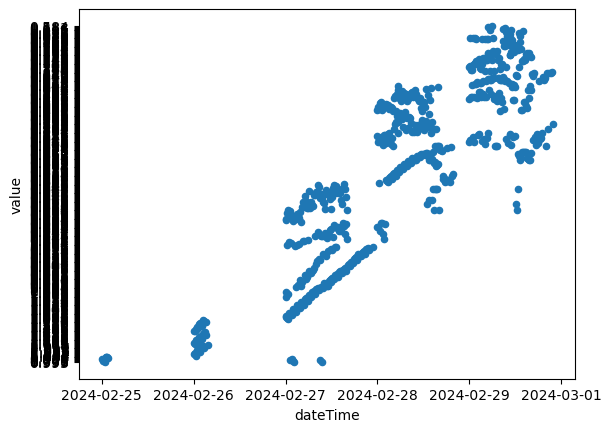

In [29]:
df25_29short.plot(y="value", x="dateTime", kind='scatter');
# OK, the data time bit is not quite right, but I get something 
# out!

In [30]:
# Do I need to do something to split the locations out again?

mask_for_cowley = df25_29short["stationReference"] == "45117"
dfcowley = df25_29short[mask_for_cowley]
dfcowley.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 11294 to 408062
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   dateTime          277 non-null    datetime64[ns, UTC]
 1   date              277 non-null    object             
 2   label             277 non-null    object             
 3   stationReference  277 non-null    object             
 4   value             277 non-null    object             
 5   hours             277 non-null    object             
 6   minutes           277 non-null    object             
 7   time              277 non-null    object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 19.5+ KB


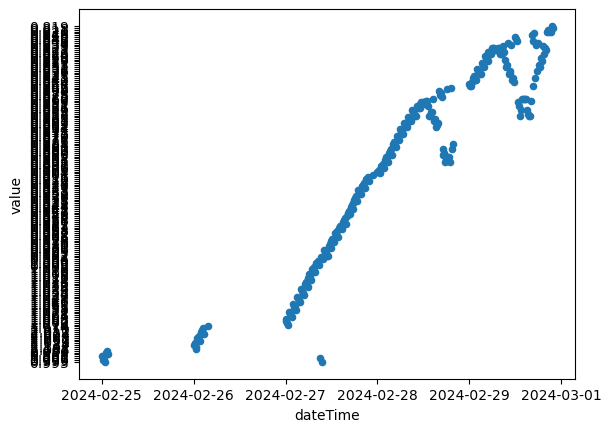

In [31]:
dfcowley.plot(y="value", x="dateTime", kind='scatter');
# bother, that doesn't look like a nice linear set of plots with 
# data recorded at regular intevals... 
# that isn't good.

In [32]:
# split out he other two and see if they look any more like I 
# expect.
mask_for_upton = df25_29short["stationReference"] == "45136"
dfupton = df25_29short[mask_for_upton]
mask_for_yeoford = df25_29short["stationReference"] == "45137"
dfyeoford = df25_29short[mask_for_yeoford]

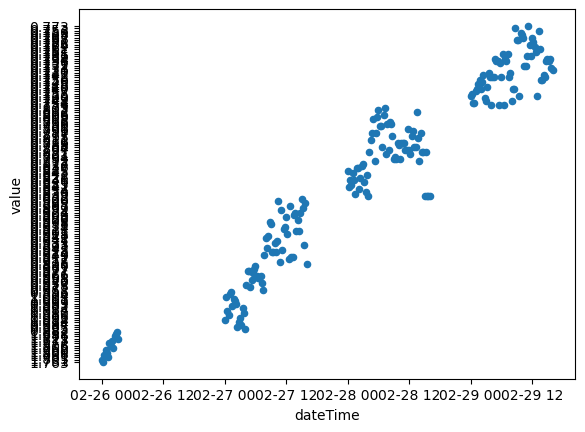

In [33]:
dfupton.plot(y="value", x="dateTime", kind='scatter');

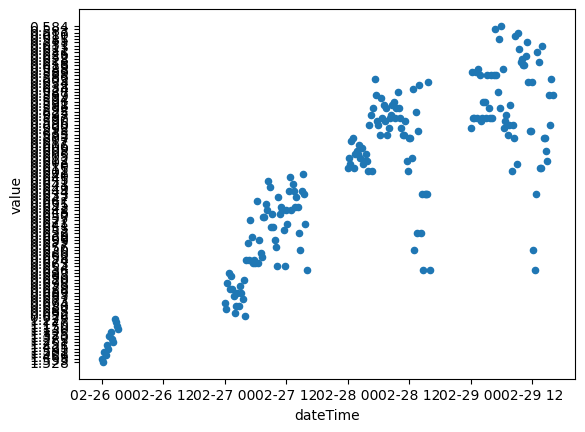

In [34]:
dfyeoford.plot(y="value", x="dateTime", kind='scatter');

In [35]:
# OK, none of those look like I expected, or hoped, that isn't 
# good.  Back to the drawing baord in terms of plotting value 
# against date/time I think

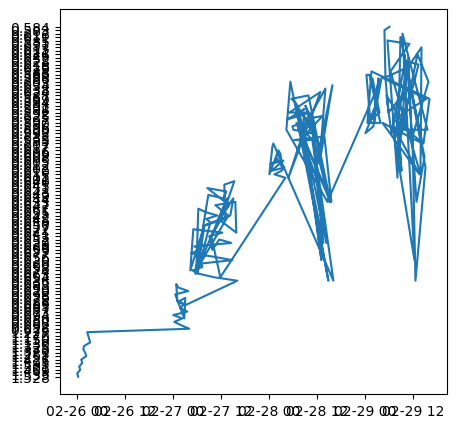

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(dfyeoford["dateTime"], dfyeoford["value"])
plt.show()
# well, that looks no better!  What am I doing to my data?

In [37]:
dfyeoford.head(20)

,dateTime,date,label,stationReference,value,hours,minutes,time
6499,2024-02-26 00:15:00+00:00,2024-02-26,Yeoford,45137,1.528,00,15,0015
7322,2024-02-26 00:00:00+00:00,2024-02-26,Yeoford,45137,1.535,00,00,0000
13697,2024-02-26 00:45:00+00:00,2024-02-26,Yeoford,45137,1.469,00,45,0045
14339,2024-02-26 00:30:00+00:00,2024-02-26,Yeoford,45137,1.501,00,30,0030
21734,2024-02-26 01:15:00+00:00,2024-02-26,Yeoford,45137,1.395,01,15,0115
22537,2024-02-26 01:00:00+00:00,2024-02-26,Yeoford,45137,1.425,01,00,0100
37723,2024-02-26 02:15:00+00:00,2024-02-26,Yeoford,45137,1.251,02,15,0215
38476,2024-02-26 02:00:00+00:00,2024-02-26,Yeoford,45137,1.283,02,00,0200
38579,2024-02-26 01:30:00+00:00,2024-02-26,Yeoford,45137,1.370,01,30,0130
38849,2024-02-26 01:45:00+00:00,2024-02-26,Yeoford,45137,1.325,01,45,0145


In [38]:
#OK, I need to sort my data!

In [39]:
dfyeoford = dfyeoford.sort_values(['date', 'hours', "minutes"], 
                                  ascending=[True, True, True])

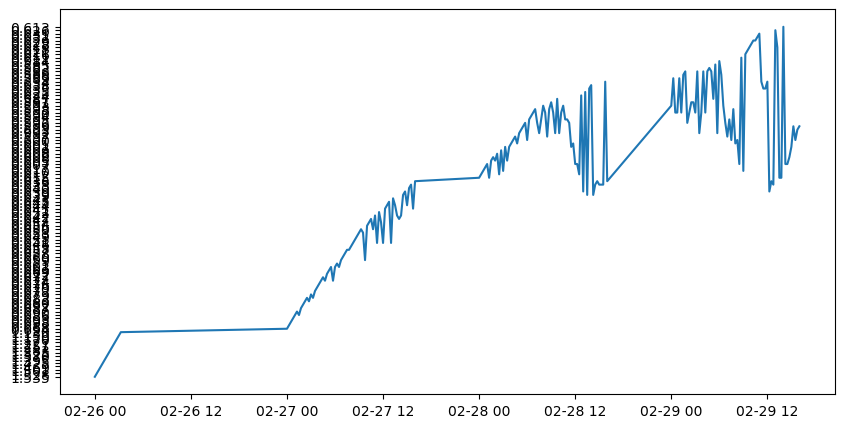

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(dfyeoford["dateTime"], dfyeoford["value"])
plt.show()
# that looks better!  But the long straight lines show that I 
# have lots of missing data

In [41]:
# I will do more with small blocks dates in a while, but for now 
# I want to move to look at river levels over a year.
# There is plenty of scope to neaten up the y axis, and I will 
# worry about that later.